In [34]:
import main
import numpy as np
import matplotlib.pyplot as plt
import csv
np.set_printoptions(precision=2)

### Question One
Solve the second-order ODE

$\frac{d^2y}{dx^2}=a\exp\left[-k(x-x_0)^2\right]$

between $x\subset\left[-2,2\right]$ given that $y_L(-2)=y_R(2)=9$.

Let $\begin{align}\frac{d^2y}{dx^2}&=y''(x,y')=p(x)y'+q(x)y+r(x)\\
&=6\exp\left[-8(x+1.428571)^2\right]\end{align}$

In [35]:
yL = 9 #left-boundary
yR = 9 #right-boundary
a = 6
k = 8
x0 = -1.428571
xL = -2
xR = 2

We divide x into evenly spaced mesh points $0\leq i\leq (n-1)$.

$x_i=x_0+ih\textrm{, }h=\frac{\left(x_{min}-x_{max}\right)}{(n-1)}$


In [36]:
N=500
x = np.linspace(xL, xR, N)
x

array([-2.  , -1.99, -1.98, -1.98, -1.97, -1.96, -1.95, -1.94, -1.94,
       -1.93, -1.92, -1.91, -1.9 , -1.9 , -1.89, -1.88, -1.87, -1.86,
       -1.86, -1.85, -1.84, -1.83, -1.82, -1.82, -1.81, -1.8 , -1.79,
       -1.78, -1.78, -1.77, -1.76, -1.75, -1.74, -1.74, -1.73, -1.72,
       -1.71, -1.7 , -1.7 , -1.69, -1.68, -1.67, -1.66, -1.66, -1.65,
       -1.64, -1.63, -1.62, -1.62, -1.61, -1.6 , -1.59, -1.58, -1.58,
       -1.57, -1.56, -1.55, -1.54, -1.54, -1.53, -1.52, -1.51, -1.5 ,
       -1.49, -1.49, -1.48, -1.47, -1.46, -1.45, -1.45, -1.44, -1.43,
       -1.42, -1.41, -1.41, -1.4 , -1.39, -1.38, -1.37, -1.37, -1.36,
       -1.35, -1.34, -1.33, -1.33, -1.32, -1.31, -1.3 , -1.29, -1.29,
       -1.28, -1.27, -1.26, -1.25, -1.25, -1.24, -1.23, -1.22, -1.21,
       -1.21, -1.2 , -1.19, -1.18, -1.17, -1.17, -1.16, -1.15, -1.14,
       -1.13, -1.13, -1.12, -1.11, -1.1 , -1.09, -1.09, -1.08, -1.07,
       -1.06, -1.05, -1.05, -1.04, -1.03, -1.02, -1.01, -1.01, -1.  ,
       -0.99, -0.98,

We now determine values for $dx$ and $dx^2$ by evaluating the expression...

$\begin{align}dx &= x_i-x_{i+1}\\
&=x_0-x_0+ih-(i+1)h\\
&=-h\textrm{, }-h=\frac{\left(x_{max}-x_{min}\right)}{(n-1)}\end{align}$

Choosing the finite difference operator $\Delta$ avoids confusion about how to calculate $dx^2$
$\begin{align}\Delta x^2&\equiv (dx)^2\\\Delta x^2&\neq x_i^2-x_{i+1}^2
\end{align}$
Making $\Delta x^2$ simple to evaluate.


In [37]:
Dx = (xR-xL)/(N-1)
DDx = Dx**2
print('Δx =',Dx,'\nΔx²=',DDx)

Δx = 0.008016032064128256 
Δx²= 6.42567700531323e-05


Now, we let $\frac{d^2y}{dx^2}=g(x)$

$\begin{align}
\frac{d^2y}{dx^2}\Rightarrow g(x)=a\exp\left[-k(x-x_0)^2\right]
\end{align}$

Also, to solve we need to evaluate $g(x)$ at the boundary conditions $y_L(x_0=-2)=9\textrm{ and, }y_R(x_{N-1}=2)=9$ as follows:

$\begin{align}
g(x_0)&=-2y_L\\g(x_{N-1})&=-2y_R
\end{align}$

In [38]:
def g(x,N):
    gx = np.zeros(N)
    for i in range(0,N-1):
        gx[i] = (a * (np.exp(-k * (x[i] - x0)**2))) * DDx
    gx[0] = yL*(-2)
    gx[N-1] = yR * (-2)
    return gx
g(x,N)

array([-1.80e+01,  3.04e-05,  3.27e-05,  3.51e-05,  3.76e-05,  4.03e-05,
        4.31e-05,  4.61e-05,  4.92e-05,  5.25e-05,  5.59e-05,  5.95e-05,
        6.33e-05,  6.72e-05,  7.14e-05,  7.56e-05,  8.01e-05,  8.48e-05,
        8.96e-05,  9.46e-05,  9.97e-05,  1.05e-04,  1.11e-04,  1.16e-04,
        1.22e-04,  1.28e-04,  1.34e-04,  1.41e-04,  1.47e-04,  1.54e-04,
        1.61e-04,  1.67e-04,  1.74e-04,  1.81e-04,  1.89e-04,  1.96e-04,
        2.03e-04,  2.11e-04,  2.18e-04,  2.26e-04,  2.33e-04,  2.41e-04,
        2.48e-04,  2.56e-04,  2.63e-04,  2.70e-04,  2.78e-04,  2.85e-04,
        2.92e-04,  2.99e-04,  3.05e-04,  3.12e-04,  3.18e-04,  3.25e-04,
        3.31e-04,  3.36e-04,  3.42e-04,  3.47e-04,  3.52e-04,  3.57e-04,
        3.61e-04,  3.65e-04,  3.69e-04,  3.72e-04,  3.75e-04,  3.78e-04,
        3.80e-04,  3.82e-04,  3.83e-04,  3.85e-04,  3.85e-04,  3.86e-04,
        3.85e-04,  3.85e-04,  3.84e-04,  3.83e-04,  3.81e-04,  3.79e-04,
        3.77e-04,  3.74e-04,  3.71e-04,  3.67e-04, 

Text(0, 0.5, 'g(x)')

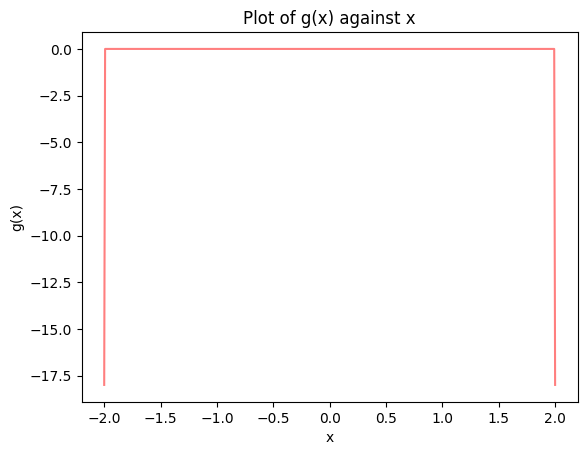

In [39]:
#plt.plot(x, g(x,N))

fig, ax = plt.subplots()
ax.plot(x, g(x,N), color="r", alpha=0.5, linestyle='-', label='Fitted line')
ax.set_title('Plot of g(x) against x')
ax.set_xlabel('x')
ax.set_ylabel('g(x)')

Then, construct the NxN matrix of values corresponding to the coefficients of $d^2y$

In [40]:
DDy = np.zeros([N,N])
for i in range(0, N-1):
    DDy[i,i-1] = 1
    DDy[i,i] = -2
    DDy[i,i+1] = 1

DDy[0,1], DDy[0,N-1], DDy[N-1,N-2] = 0, 0, 0
DDy[N-1,N-1] = -2
DDy

array([[-2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0., -2.]])

Determine $y$ at all mesh points of $x$ by:

$\bold{Y} = [\Delta \bold{Y}]^{-2} \cdot \bold{G}
$

In [41]:
DDy = np.linalg.inv(DDy)
_arr = g(x,N)
y = np.dot(DDy,_arr)
y

array([9.  , 8.97, 8.95, 8.92, 8.9 , 8.87, 8.85, 8.82, 8.8 , 8.77, 8.75,
       8.72, 8.7 , 8.67, 8.65, 8.62, 8.6 , 8.57, 8.55, 8.52, 8.5 , 8.48,
       8.45, 8.43, 8.4 , 8.38, 8.36, 8.33, 8.31, 8.29, 8.26, 8.24, 8.22,
       8.19, 8.17, 8.15, 8.13, 8.11, 8.08, 8.06, 8.04, 8.02, 8.  , 7.98,
       7.96, 7.94, 7.92, 7.9 , 7.88, 7.86, 7.84, 7.83, 7.81, 7.79, 7.77,
       7.76, 7.74, 7.72, 7.71, 7.69, 7.68, 7.66, 7.65, 7.63, 7.62, 7.61,
       7.59, 7.58, 7.57, 7.56, 7.54, 7.53, 7.52, 7.51, 7.5 , 7.49, 7.48,
       7.48, 7.47, 7.46, 7.45, 7.44, 7.44, 7.43, 7.42, 7.42, 7.41, 7.41,
       7.4 , 7.4 , 7.39, 7.39, 7.39, 7.38, 7.38, 7.38, 7.38, 7.37, 7.37,
       7.37, 7.37, 7.37, 7.37, 7.37, 7.37, 7.37, 7.37, 7.37, 7.37, 7.37,
       7.37, 7.37, 7.37, 7.37, 7.38, 7.38, 7.38, 7.38, 7.38, 7.39, 7.39,
       7.39, 7.39, 7.4 , 7.4 , 7.4 , 7.41, 7.41, 7.41, 7.42, 7.42, 7.42,
       7.43, 7.43, 7.43, 7.44, 7.44, 7.44, 7.45, 7.45, 7.46, 7.46, 7.46,
       7.47, 7.47, 7.48, 7.48, 7.48, 7.49, 7.49, 7.

Determine the minimum value of $\bold{Y}$ by iterating over each $\bold{Y}_i:i\ge0$ and evaluating whether that value is smaller than any other value of $\bold{Y}$

[-1.1583166332665331, 7.367667211718798]


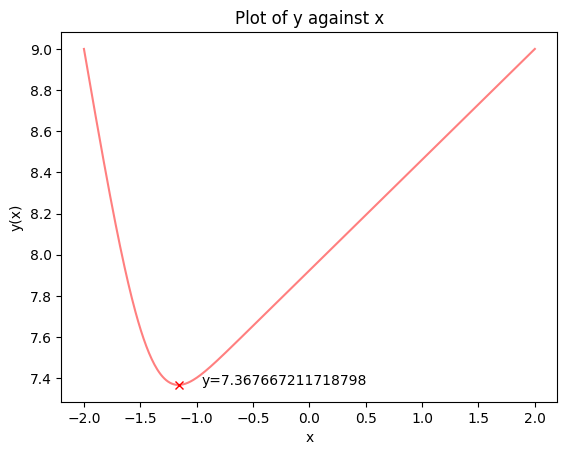

In [42]:
_temp, i = [0,y[0]], 0
while(i < y.shape[0]):
    if(_temp[1]>y[i]):
        _temp = [x[i],y[i]]
    i += 1
fig, ax = plt.subplots()
ax.plot(x, y, color="r", alpha=0.5, linestyle='-', label='Fitted line')
ax.set_title('Plot of y against x')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.plot([_temp[0]], [_temp[1]], 'rx')
ax.annotate('y='+str(_temp[1]),[_temp[0]+0.2,_temp[1]])
print(_temp)

### Question Two
A periodic function $f(x)$ is defined on the interval $[-7,7)$
Given the values for $f(x)$ at $25$ evenly spaced points on the interval for x, calculate a fourier series of this data.

Provide an answer in the form $\frac{a_2}{b_2}$, the ratio of the coefficients of the $2^{nd}\textrm{ }sin()\textrm{ and }cos()$ terms.

First, we open the data and construct our array of values.

In [43]:
xL = -7
xR = 7
# #define function to read csv data into an array given a filename
# def opencsv(file):
#     with open("".join( ["data/",file] ), 'r') as f:
#         r = csv.reader(f)
#         data = list(r)
#     #return array of values
#     return np.array(data,dtype=float)

file = "test-3_q2.csv"
val = main.opencsv(file)
#append evenly spaced mesh for x
#don't include endpoint in np.linspace() as the interval is open at x=7
val = np.append([np.linspace(xL, xR, val.shape[1], endpoint=False)], val, axis=0)
val

array([[-7.  , -6.44, -5.88, -5.32, -4.76, -4.2 , -3.64, -3.08, -2.52,
        -1.96, -1.4 , -0.84, -0.28,  0.28,  0.84,  1.4 ,  1.96,  2.52,
         3.08,  3.64,  4.2 ,  4.76,  5.32,  5.88,  6.44],
       [-0.3 , -0.57, -0.85, -0.87, -0.43,  0.33,  0.86,  0.65, -0.3 ,
        -1.34, -1.58, -0.61,  1.14,  2.62,  2.98,  2.13,  0.76, -0.2 ,
        -0.29,  0.26,  0.82,  0.96,  0.66,  0.24, -0.07]])

To determine $\Delta x$ we take:

 $\Delta x = x_1-x_0$

To find $a_2$ the coefficient of $cos(\frac{m\pi x}{l})$ we take the sum from $x:[-l,l)$ of

$\displaystyle a_m=\frac{1}{l}\sum_{i=0}^{N-1}\phi_m(x_i)f(x_i)\Delta x\textrm{,}\\\textrm{where }\phi_m(x)=cos\left(\frac{m\pi x}{l}\right)\textrm{ and }m=2$

To find $b_2$ the coefficient of $sin(\frac{m\pi x}{l})$ we take the sum from $x:[-l,l)$ of

$\displaystyle b_m=\frac{1}{l}\sum_{i=0}^{N-1}\psi_m(x_i)f(x_i)\Delta x\textrm{,}\\\textrm{where }\psi_m(x)=sin\left(\frac{m\pi x}{l}\right)\textrm{ and }m=2$

In [44]:
a, b = 0, 0
dx = val[0][0]-val[0][1]
for i in range(0,25):
    a+=np.cos((2*(np.pi)*val[0][i])/7)*val[1][i]*dx
    b+=np.sin((2*(np.pi)*val[0][i])/7)*val[1][i]*dx
a /= 7
b /= 7
print(a/b)

0.5447638927057885
